In [91]:
import pandas as pd

In [92]:
import datetime

In [93]:
def get_date(time):
    time=datetime.datetime.strftime(time,'%Y-%m-%d')
    return time

### 获取数据

In [94]:
data = pd.read_csv('../data set/gd_train_data.csv',names=['Use_city','Line_name','Terminal_id','Card_id','Create_city','Deal_time','Card_type'])
data.head()

,Use_city,Line_name,Terminal_id,Card_id,Create_city,Deal_time,Card_type
0,广州,281,4589bb610f9be53a43a7bc26bb40e44d,8ce79e0b647053f191d20c5552eb49f0,广州,2014082016,普通卡
1,广州,281,9c9eb0595e01d0cb59c295945c3ff2d6,2f7bef8cdab54fcdf9feefd89188a971,广州,2014082118,普通卡
2,广州,281,3f9c5fb36b3558e9bdf2b498e4b17d67,36f7c3edb84d90fa2427ffe60f014d38,广州,2014082114,普通卡
3,广州,281,9810dbdd5ff325b4078a3ffcaa538574,875cb3e21f66347b6d1420f201fd4ca6,广州,2014082118,普通卡
4,广州,565,36856ea753f808b71500a18cd406e1b3,3c100e9c9a7086c7007df8e136e78823,广州,2014082115,普通卡


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8926605 entries, 0 to 8926604
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Use_city     object
 1   Line_name    int64 
 2   Terminal_id  object
 3   Card_id      object
 4   Create_city  object
 5   Deal_time    int64 
 6   Card_type    object
dtypes: int64(2), object(5)
memory usage: 476.7+ MB


In [96]:
data.describe()

,Line_name,Deal_time
count,8.926605e+06,8.926605e+06
mean,3.733057e+02,2.014102e+09
std,1.330206e+02,1.392176e+04
min,2.810000e+02,2.014080e+09
25%,2.810000e+02,2.014091e+09
50%,2.810000e+02,2.014102e+09
75%,5.650000e+02,2.014113e+09
max,5.650000e+02,2.014123e+09


In [97]:
data['Line_name'].unique()

array([281, 565], dtype=int64)

### 按线路切割

In [98]:
line_281_data = data[data['Line_name']==281]
line_281_data.head()

,Use_city,Line_name,Terminal_id,Card_id,Create_city,Deal_time,Card_type
0,广州,281,4589bb610f9be53a43a7bc26bb40e44d,8ce79e0b647053f191d20c5552eb49f0,广州,2014082016,普通卡
1,广州,281,9c9eb0595e01d0cb59c295945c3ff2d6,2f7bef8cdab54fcdf9feefd89188a971,广州,2014082118,普通卡
2,广州,281,3f9c5fb36b3558e9bdf2b498e4b17d67,36f7c3edb84d90fa2427ffe60f014d38,广州,2014082114,普通卡
3,广州,281,9810dbdd5ff325b4078a3ffcaa538574,875cb3e21f66347b6d1420f201fd4ca6,广州,2014082118,普通卡
6,广州,281,67a5210e1ead8a6ab70d1b9f5bebb815,41b8372a9e685ab4f25eeeae7badf521,广州,2014082113,普通卡


In [99]:
line_565_data = data[data['Line_name']==565]
line_565_data.head()

,Use_city,Line_name,Terminal_id,Card_id,Create_city,Deal_time,Card_type
4,广州,565,36856ea753f808b71500a18cd406e1b3,3c100e9c9a7086c7007df8e136e78823,广州,2014082115,普通卡
5,广州,565,835993d3d7708e79468043d5180c66ea,bdff7a26421e33bbfcf700a6b873188b,广州,2014082122,普通卡
10,广州,565,7c01754291953916a8e7a496d7ebcad4,eeb4738025fd955bcc1f8acf49767ad7,广州,2014082115,普通卡
12,广州,565,7c01754291953916a8e7a496d7ebcad4,e29ca2c7461ecc37d6652b76815b65e8,广州,2014082117,普通卡
17,广州,565,7c01754291953916a8e7a496d7ebcad4,1e6e8595275541a26376b35b224d8e73,广州,2014082108,普通卡


### 时间与客流量的关系

In [100]:
line_281_data['Deal_time']=pd.to_datetime(line_281_data['Deal_time'],format='%Y%m%d%H')
line_281_data.head()

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Use_city,Line_name,Terminal_id,Card_id,Create_city,Deal_time,Card_type
0,广州,281,4589bb610f9be53a43a7bc26bb40e44d,8ce79e0b647053f191d20c5552eb49f0,广州,2014-08-20 16:00:00,普通卡
1,广州,281,9c9eb0595e01d0cb59c295945c3ff2d6,2f7bef8cdab54fcdf9feefd89188a971,广州,2014-08-21 18:00:00,普通卡
2,广州,281,3f9c5fb36b3558e9bdf2b498e4b17d67,36f7c3edb84d90fa2427ffe60f014d38,广州,2014-08-21 14:00:00,普通卡
3,广州,281,9810dbdd5ff325b4078a3ffcaa538574,875cb3e21f66347b6d1420f201fd4ca6,广州,2014-08-21 18:00:00,普通卡
6,广州,281,67a5210e1ead8a6ab70d1b9f5bebb815,41b8372a9e685ab4f25eeeae7badf521,广州,2014-08-21 13:00:00,普通卡


In [101]:
line_281_passengerbytime = line_281_data.groupby('Deal_time').count()['Card_id']
line_281_passengerbytime = pd.DataFrame(line_281_passengerbytime).reset_index()
line_281_passengerbytime.head()

,Deal_time,Card_id
0,2014-08-01 00:00:00,86
1,2014-08-01 05:00:00,37
2,2014-08-01 06:00:00,1118
3,2014-08-01 07:00:00,4448
4,2014-08-01 08:00:00,4964


In [102]:
import matplotlib.pyplot as plt

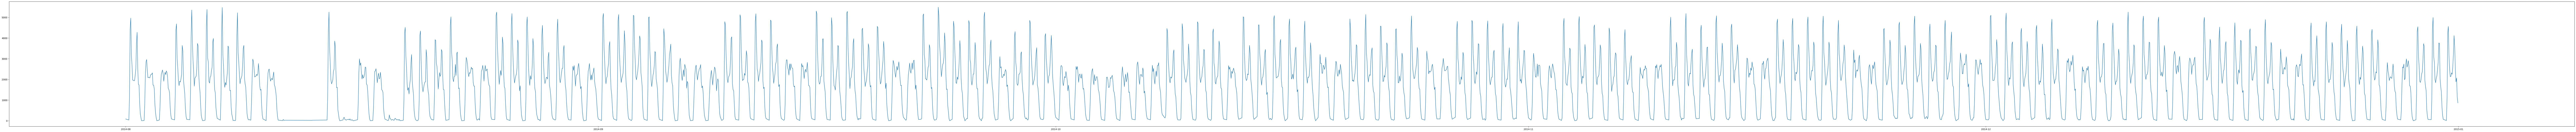

In [103]:
plt.figure(figsize=(200,10),dpi=100)
plt.plot(line_281_passengerbytime['Deal_time'],line_281_passengerbytime['Card_id'])
plt.show()

### 10月与客流量的关系

In [104]:
line_281_passengerbytime_10 = line_281_passengerbytime[line_281_passengerbytime['Deal_time']>='2014-10-01']
line_281_passengerbytime_10 = line_281_passengerbytime_10[line_281_passengerbytime_10['Deal_time']<'2014-11-01']
line_281_passengerbytime_10.head()

,Deal_time,Card_id
1230,2014-10-01 00:00:00,164
1231,2014-10-01 05:00:00,23
1232,2014-10-01 06:00:00,686
1233,2014-10-01 07:00:00,2048
1234,2014-10-01 08:00:00,2648


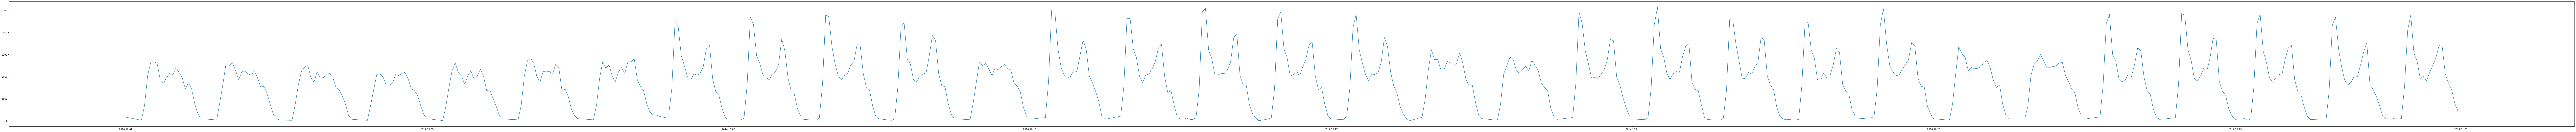

In [105]:
plt.figure(figsize=(200,10),dpi=100)
plt.plot(line_281_passengerbytime_10['Deal_time'],line_281_passengerbytime_10['Card_id'])
plt.show()

### 某天与客流量的关系

In [106]:
line_281_day=line_281_passengerbytime[line_281_passengerbytime['Deal_time']>='2014-9-23']
line_281_day=line_281_day[line_281_day['Deal_time']<'2014-9-24']
line_281_day

,Deal_time,Card_id
1056,2014-09-23 00:00:00,92
1057,2014-09-23 01:00:00,28
1058,2014-09-23 04:00:00,57
1059,2014-09-23 05:00:00,158
1060,2014-09-23 06:00:00,1851
1061,2014-09-23 07:00:00,5492
1062,2014-09-23 08:00:00,5085
1063,2014-09-23 09:00:00,3726
1064,2014-09-23 10:00:00,3278
1065,2014-09-23 11:00:00,2620


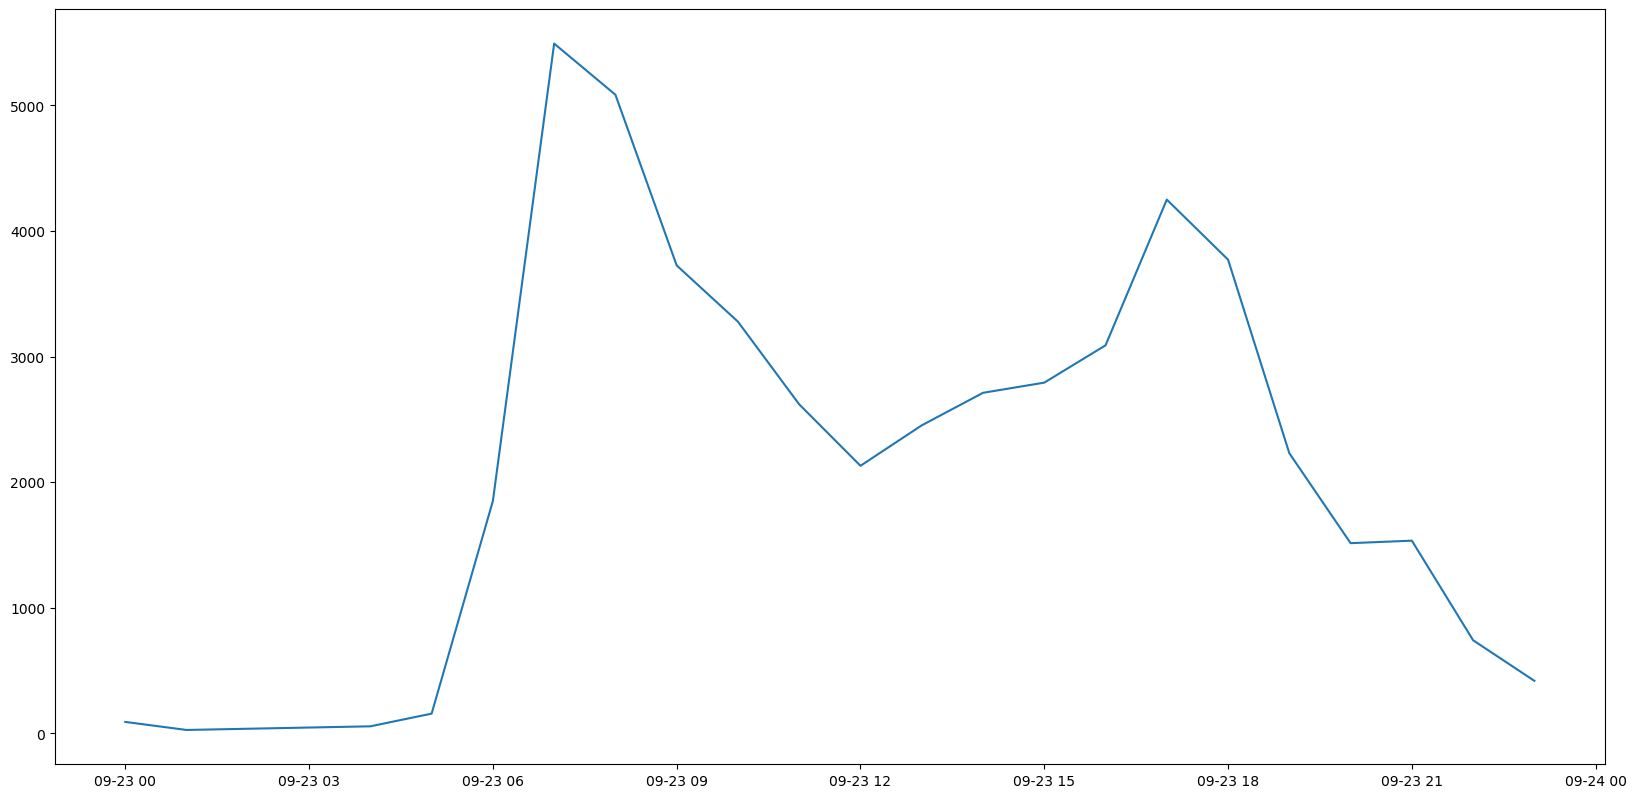

In [107]:
plt.figure(figsize=(20,10),dpi=100)
plt.plot(line_281_day['Deal_time'],line_281_day['Card_id'])
plt.show()

### 卡类型对客流量的影响

In [108]:
line_281_data['Card_type'].drop_duplicates()

0            普通卡
9            老人卡
15           学生卡
30           残疾卡
167          员工卡
5083       治安监督卡
3636568      军属卡
Name: Card_type, dtype: object

In [109]:
cardmap={'普通卡':0,'老人卡':1,'学生卡':2,'残疾卡':3,'员工卡':4,'治安监督卡':5,'军属卡':6}

In [110]:
line_281_data

,Use_city,Line_name,Terminal_id,Card_id,Create_city,Deal_time,Card_type
0,广州,281,4589bb610f9be53a43a7bc26bb40e44d,8ce79e0b647053f191d20c5552eb49f0,广州,2014-08-20 16:00:00,普通卡
1,广州,281,9c9eb0595e01d0cb59c295945c3ff2d6,2f7bef8cdab54fcdf9feefd89188a971,广州,2014-08-21 18:00:00,普通卡
2,广州,281,3f9c5fb36b3558e9bdf2b498e4b17d67,36f7c3edb84d90fa2427ffe60f014d38,广州,2014-08-21 14:00:00,普通卡
3,广州,281,9810dbdd5ff325b4078a3ffcaa538574,875cb3e21f66347b6d1420f201fd4ca6,广州,2014-08-21 18:00:00,普通卡
6,广州,281,67a5210e1ead8a6ab70d1b9f5bebb815,41b8372a9e685ab4f25eeeae7badf521,广州,2014-08-21 13:00:00,普通卡
...,...,...,...,...,...,...,...
8926600,广州,281,dc8c64c024d6509becdd734109c9effa,b18ea70597844f8773fc6620c73682b7,广州,2014-10-23 21:00:00,普通卡
8926601,广州,281,5ed07f0cae83668f86a2a8a01c0f34c5,88d8cbee0ccf727a719482c326a7b3b2,广州,2014-10-23 10:00:00,普通卡
8926602,广州,281,f10ef3bf699d5e16c9a4634bfd9704ae,d24d3c00ad2fe35b3d14cd9433266dea,广州,2014-10-23 09:00:00,普通卡
8926603,广州,281,8d652971eb369829b89ae128d91dd944,58907e6f436343ef6ab2ec43ca3c5bb6,广州,2014-10-23 19:00:00,老人卡


In [111]:
def get_card_type(card):
    for key,value in cardmap.items():
        if card==key:
            card=value
    return card

In [112]:
line_281_data['card_type']=line_281_data['Card_type'].apply(get_card_type)
line_281_data

D:\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Use_city,Line_name,Terminal_id,Card_id,Create_city,Deal_time,Card_type,card_type
0,广州,281,4589bb610f9be53a43a7bc26bb40e44d,8ce79e0b647053f191d20c5552eb49f0,广州,2014-08-20 16:00:00,普通卡,0
1,广州,281,9c9eb0595e01d0cb59c295945c3ff2d6,2f7bef8cdab54fcdf9feefd89188a971,广州,2014-08-21 18:00:00,普通卡,0
2,广州,281,3f9c5fb36b3558e9bdf2b498e4b17d67,36f7c3edb84d90fa2427ffe60f014d38,广州,2014-08-21 14:00:00,普通卡,0
3,广州,281,9810dbdd5ff325b4078a3ffcaa538574,875cb3e21f66347b6d1420f201fd4ca6,广州,2014-08-21 18:00:00,普通卡,0
6,广州,281,67a5210e1ead8a6ab70d1b9f5bebb815,41b8372a9e685ab4f25eeeae7badf521,广州,2014-08-21 13:00:00,普通卡,0
...,...,...,...,...,...,...,...,...
8926600,广州,281,dc8c64c024d6509becdd734109c9effa,b18ea70597844f8773fc6620c73682b7,广州,2014-10-23 21:00:00,普通卡,0
8926601,广州,281,5ed07f0cae83668f86a2a8a01c0f34c5,88d8cbee0ccf727a719482c326a7b3b2,广州,2014-10-23 10:00:00,普通卡,0
8926602,广州,281,f10ef3bf699d5e16c9a4634bfd9704ae,d24d3c00ad2fe35b3d14cd9433266dea,广州,2014-10-23 09:00:00,普通卡,0
8926603,广州,281,8d652971eb369829b89ae128d91dd944,58907e6f436343ef6ab2ec43ca3c5bb6,广州,2014-10-23 19:00:00,老人卡,1


In [113]:
line_281_passengerbycard = line_281_data.groupby('card_type').count()['Card_id']
line_281_passengerbycard = pd.DataFrame(line_281_passengerbycard).reset_index()
line_281_passengerbycard

,card_type,Card_id
0,0,4608681
1,1,1011072
2,2,319506
3,3,42528
4,4,42565
5,5,927
6,6,1


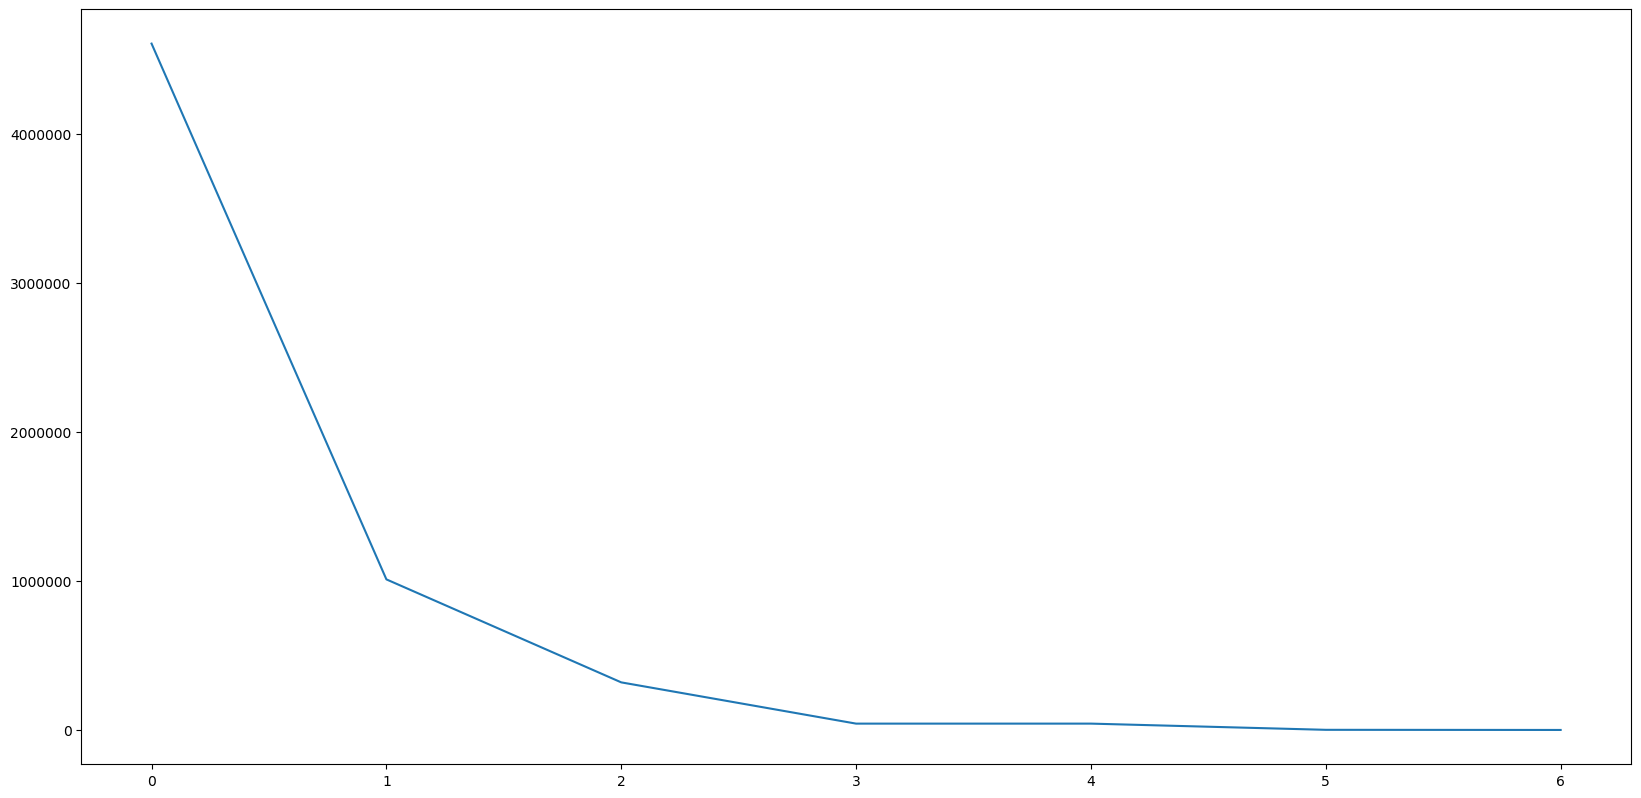

In [114]:
plt.figure(figsize=(20,10),dpi=100)
plt.plot(line_281_passengerbycard['card_type'],line_281_passengerbycard['Card_id'])
plt.show()

In [115]:
line_281_passengerbycard=pd.DataFrame(line_281_passengerbycard).reset_index()
line_281_passengerbycard.corr()

,index,card_type,Card_id
index,1.000000,1.000000,-0.735093
card_type,1.000000,1.000000,-0.735093
Card_id,-0.735093,-0.735093,1.000000


In [116]:
#line_281_passenger_card=line_281_data[['Date_time','card_type']]
#line_281_passenger_card

In [117]:
#line_281_passenger_card=pd.DataFrame(line_281_passenger_card).reset_index()
#line_281_passenger_card['Date_time']=pd.to_datetime(line_281_passenger_card['Date_time'])
#line_281_passenger_card.info()

In [118]:
#line_281_passengerbytime= line_281_data.groupby(['Deal_time','card_type']).count()['Card_id']
#line_281_passengerbytime=pd.DataFrame(line_281_passengerbytime).reset_index()
#line_281_passengerbytime

## 查看天气对客流量的影响

In [119]:
weather_data = pd.read_csv('../data set/gd_weather_report.csv', names=['Date_time','Weather','Temperature','Wind_direction_force'])
weather_data.head()

,Date_time,Weather,Temperature,Wind_direction_force
0,2014/8/1,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级
1,2014/8/2,雷阵雨/雷阵雨,35℃/26℃,无持续风向≤3级/无持续风向≤3级
2,2014/8/3,雷阵雨/雷阵雨,35℃/25℃,无持续风向≤3级/无持续风向≤3级
3,2014/8/4,多云/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级
4,2014/8/5,雷阵雨/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级


In [120]:
weather_data['Weather'].drop_duplicates()

0         晴/雷阵雨
1       雷阵雨/雷阵雨
3         多云/多云
4        雷阵雨/多云
12      大雨/中到大雨
13     中到大雨/雷阵雨
17       多云/雷阵雨
18      大雨/大到暴雨
23         多云/晴
24          晴/晴
25         晴/多云
43       雷阵雨/阵雨
45        多云/大雨
46        大雨/中雨
51         阴/多云
84          阴/阴
85         多云/阴
96        多云/小雨
98      小雨/小到中雨
99       小到中雨/阴
101        阴/小雨
103        小雨/阴
121       小雨/小雨
124     中雨/中到大雨
125       小雨/多云
139        晴/小雨
164     中到大雨/中雨
173         霾/霾
Name: Weather, dtype: object

In [121]:
weather_data['Temperature'].drop_duplicates()

0      36℃/26℃
1      35℃/26℃
2      35℃/25℃
3      34℃/26℃
6      32℃/26℃
        ...   
176    21℃/14℃
177    23℃/15℃
178    25℃/14℃
180    21℃/13℃
181    21℃/12℃
Name: Temperature, Length: 109, dtype: object

In [122]:
weather_data['Wind_direction_force'].drop_duplicates()

0           无持续风向≤3级/无持续风向≤3级
45             东北风3-4级/东风4-5级
46             东风4-5级/东南风3-4级
50            东北风3-4级/东北风3-4级
51           东北风3-4级/无持续风向≤3级
72            无持续风向≤3级/北风3-4级
73            北风3-4级/无持续风向≤3级
93              北风3-4级/北风3-4级
121           无持续风向≤3级/北风4-5级
122             北风4-5级/北风3-4级
125           北风4-5级/无持续风向≤3级
136    无持续风向微风转3-4级/北风微风转3-4级
137             北风4-5级/北风4-5级
Name: Wind_direction_force, dtype: object

### 风力对客流量的影响

In [123]:
windmap={'无持续风向≤3级':0,'无持续风向微风转3-4级':1,'北风微风转3-4级':1,'东北风3-4级':2,'北风3-4级':2,'东南风3-4级':2,'东风4-5级':3,'北风4-5级':3}

In [124]:
def get_front_wind(wind):
    x1=wind.split('/')[0]
    for key,value in windmap.items():
        if x1==key:
            x1=value
    return x1

def get_behind_wind(wind):
    x2=wind.split('/')[1]
    for key,value in windmap.items():
        if x2==key:
            x2=value
    return x2

def get_avg_wind(wind):
    x1=wind.split('/')[0]
    x2=wind.split('/')[1]
    for key,value in windmap.items():
        if x1==key:
            x1=value
        if x2==key:
            x2=value
    return (x1+x2)/2

weather_data['front_wind']=weather_data['Wind_direction_force'].apply(get_front_wind)
weather_data['behind_wind']=weather_data['Wind_direction_force'].apply(get_behind_wind)
weather_data['avg_wind']=weather_data['Wind_direction_force'].apply(get_avg_wind)
weather_data

,Date_time,Weather,Temperature,Wind_direction_force,front_wind,behind_wind,avg_wind
0,2014/8/1,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
1,2014/8/2,雷阵雨/雷阵雨,35℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
2,2014/8/3,雷阵雨/雷阵雨,35℃/25℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
3,2014/8/4,多云/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
4,2014/8/5,雷阵雨/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
...,...,...,...,...,...,...,...
179,2015/1/27,多云/多云,24℃/14℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
180,2015/1/28,多云/多云,21℃/13℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
181,2015/1/29,多云/阴,21℃/12℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0
182,2015/1/30,阴/多云,17℃/8℃,北风3-4级/无持续风向≤3级,2,0,1.0


### 气候对客流量的影响

In [125]:
weathermap={'晴':0,'多云':1,'阴':2,'小雨':3,'小到中雨':4,'中雨':5,'中到大雨':6,'大雨':7,'大到暴雨':8,'霾':9,'阵雨':10,'雷阵雨':11}

In [126]:
def get_front_weather(weather):
    x1=weather.split('/')[0]
    for key,value in weathermap.items():
        if x1==key:
            x1=value
    return x1

def get_behind_weather(weather):
    x2=weather.split('/')[1]
    for key,value in weathermap.items():
        if x2==key:
            x2=value
    return x2

def get_avg_weather(weather):
    x1=weather.split('/')[0]
    x2=weather.split('/')[1]
    for key,value in weathermap.items():
        if x1==key:
            x1=value
        if x2==key:
            x2=value
    return (x1+x2)/2

weather_data['front_weather']=weather_data['Weather'].apply(get_front_weather)
weather_data['behind_weather']=weather_data['Weather'].apply(get_behind_weather)
weather_data['avg_weather']=weather_data['Weather'].apply(get_avg_weather)
weather_data

,Date_time,Weather,Temperature,Wind_direction_force,front_wind,behind_wind,avg_wind,front_weather,behind_weather,avg_weather
0,2014/8/1,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5
1,2014/8/2,雷阵雨/雷阵雨,35℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0
2,2014/8/3,雷阵雨/雷阵雨,35℃/25℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0
3,2014/8/4,多云/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0
4,2014/8/5,雷阵雨/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,1,6.0
...,...,...,...,...,...,...,...,...,...,...
179,2015/1/27,多云/多云,24℃/14℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0
180,2015/1/28,多云/多云,21℃/13℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0
181,2015/1/29,多云/阴,21℃/12℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,2,1.5
182,2015/1/30,阴/多云,17℃/8℃,北风3-4级/无持续风向≤3级,2,0,1.0,2,1,1.5


### 温度对客流量的影响

In [127]:
def get_high_temp(temp):
    x1=temp.split('/')[0]
    x1=int(x1[:-1])
    return x1

def get_low_temp(temp):
    x2=temp.split('/')[1]
    x2=int(x2[:-1])
    return x2

def get_avg_temp(temp):
    x1=temp.split('/')[0]
    x2=temp.split('/')[1]
    x1=int(x1[:-1])
    x2=int(x2[:-1])
    return (x1+x2)/2

weather_data['high_temperature']=weather_data['Temperature'].apply(get_high_temp)
weather_data['low_temperature']=weather_data['Temperature'].apply(get_low_temp)
weather_data['avg_temperature']=weather_data['Temperature'].apply(get_avg_temp)
weather_data

,Date_time,Weather,Temperature,Wind_direction_force,front_wind,behind_wind,avg_wind,front_weather,behind_weather,avg_weather,high_temperature,low_temperature,avg_temperature
0,2014/8/1,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0
1,2014/8/2,雷阵雨/雷阵雨,35℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,26,30.5
2,2014/8/3,雷阵雨/雷阵雨,35℃/25℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,25,30.0
3,2014/8/4,多云/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,34,26,30.0
4,2014/8/5,雷阵雨/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,1,6.0,34,26,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2015/1/27,多云/多云,24℃/14℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,24,14,19.0
180,2015/1/28,多云/多云,21℃/13℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,21,13,17.0
181,2015/1/29,多云/阴,21℃/12℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,2,1.5,21,12,16.5
182,2015/1/30,阴/多云,17℃/8℃,北风3-4级/无持续风向≤3级,2,0,1.0,2,1,1.5,17,8,12.5


## 分析气候，温度，风力对客流量的影响 

### 依据时间将表内连接

In [128]:
line_281_passengerbytime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Deal_time  3183 non-null   datetime64[ns]
 1   Card_id    3183 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 49.9 KB


In [129]:
line_281_passengerbytime.head()

,Deal_time,Card_id
0,2014-08-01 00:00:00,86
1,2014-08-01 05:00:00,37
2,2014-08-01 06:00:00,1118
3,2014-08-01 07:00:00,4448
4,2014-08-01 08:00:00,4964


In [130]:
line_281_passengerbytime['Date_time']=line_281_passengerbytime['Deal_time'].apply(get_date)
line_281_passengerbytime.head()

,Deal_time,Card_id,Date_time
0,2014-08-01 00:00:00,86,2014-08-01
1,2014-08-01 05:00:00,37,2014-08-01
2,2014-08-01 06:00:00,1118,2014-08-01
3,2014-08-01 07:00:00,4448,2014-08-01
4,2014-08-01 08:00:00,4964,2014-08-01


In [131]:
line_281_passengerbyday=line_281_passengerbytime.groupby('Date_time').sum()['Card_id']
line_281_passengerbyday

Date_time
2014-08-01    44256
2014-08-02    34941
2014-08-03    32741
2014-08-04    40450
2014-08-05    44281
              ...  
2014-12-27    33440
2014-12-28    36396
2014-12-29    42565
2014-12-30    43417
2014-12-31    46515
Name: Card_id, Length: 152, dtype: int64

In [132]:
line_281_passengerbyday=pd.DataFrame(line_281_passengerbyday).reset_index()
line_281_passengerbyday

,Date_time,Card_id
0,2014-08-01,44256
1,2014-08-02,34941
2,2014-08-03,32741
3,2014-08-04,40450
4,2014-08-05,44281
...,...,...
147,2014-12-27,33440
148,2014-12-28,36396
149,2014-12-29,42565
150,2014-12-30,43417


In [133]:
weather_data['Date_time']=pd.to_datetime(weather_data['Date_time'])
weather_data

,Date_time,Weather,Temperature,Wind_direction_force,front_wind,behind_wind,avg_wind,front_weather,behind_weather,avg_weather,high_temperature,low_temperature,avg_temperature
0,2014-08-01,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0
1,2014-08-02,雷阵雨/雷阵雨,35℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,26,30.5
2,2014-08-03,雷阵雨/雷阵雨,35℃/25℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,25,30.0
3,2014-08-04,多云/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,34,26,30.0
4,2014-08-05,雷阵雨/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,1,6.0,34,26,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2015-01-27,多云/多云,24℃/14℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,24,14,19.0
180,2015-01-28,多云/多云,21℃/13℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,21,13,17.0
181,2015-01-29,多云/阴,21℃/12℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,2,1.5,21,12,16.5
182,2015-01-30,阴/多云,17℃/8℃,北风3-4级/无持续风向≤3级,2,0,1.0,2,1,1.5,17,8,12.5


In [134]:
line_281_passengerbyday['Date_time']=pd.to_datetime(line_281_passengerbyday['Date_time'])
line_281_passengerbyday

,Date_time,Card_id
0,2014-08-01,44256
1,2014-08-02,34941
2,2014-08-03,32741
3,2014-08-04,40450
4,2014-08-05,44281
...,...,...
147,2014-12-27,33440
148,2014-12-28,36396
149,2014-12-29,42565
150,2014-12-30,43417


In [135]:
weather_passenger=pd.merge(weather_data,line_281_passengerbyday,on='Date_time',how='inner')
weather_passenger=weather_passenger.sort_values(by='Date_time')
weather_passenger

,Date_time,Weather,Temperature,Wind_direction_force,front_wind,behind_wind,avg_wind,front_weather,behind_weather,avg_weather,high_temperature,low_temperature,avg_temperature,Card_id
0,2014-08-01,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0,44256
1,2014-08-02,雷阵雨/雷阵雨,35℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,26,30.5,34941
2,2014-08-03,雷阵雨/雷阵雨,35℃/25℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,25,30.0,32741
3,2014-08-04,多云/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,34,26,30.0,40450
4,2014-08-05,雷阵雨/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,1,6.0,34,26,30.0,44281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2014-12-27,小雨/小雨,18℃/9℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,3,3,3.0,18,9,13.5,33440
148,2014-12-28,多云/晴,17℃/7℃,北风3-4级/无持续风向≤3级,2,0,1.0,1,0,0.5,17,7,12.0,36396
149,2014-12-29,晴/晴,18℃/4℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,0,0.0,18,4,11.0,42565
150,2014-12-30,晴/晴,19℃/6℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,0,0.0,19,6,12.5,43417


### 查看气温对客流量的影响

#### 计算某平均温度的客流量

In [136]:
temp_passenger=weather_passenger.groupby('avg_temperature').sum()['Card_id']
temp_passenger=pd.DataFrame(temp_passenger).reset_index()
temp_passenger.head()

,avg_temperature,Card_id
0,10.0,42911
1,10.5,43173
2,11.0,125771
3,11.5,120040
4,12.0,159966


#### 计算某平均温度的天数

In [137]:
weather_passenger.head()

,Date_time,Weather,Temperature,Wind_direction_force,front_wind,behind_wind,avg_wind,front_weather,behind_weather,avg_weather,high_temperature,low_temperature,avg_temperature,Card_id
0,2014-08-01,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0,44256
1,2014-08-02,雷阵雨/雷阵雨,35℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,26,30.5,34941
2,2014-08-03,雷阵雨/雷阵雨,35℃/25℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,11,11.0,35,25,30.0,32741
3,2014-08-04,多云/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,1,1,1.0,34,26,30.0,40450
4,2014-08-05,雷阵雨/多云,34℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,11,1,6.0,34,26,30.0,44281


In [138]:
temp_day=weather_passenger.groupby('avg_temperature').count()['Date_time']
temp_day=pd.DataFrame(temp_day).reset_index()
temp_day

,avg_temperature,Date_time
0,10.0,1
1,10.5,1
2,11.0,3
3,11.5,3
4,12.0,4
5,12.5,3
6,13.0,2
7,13.5,2
8,14.0,3
9,14.5,1


#### 连接表 求某平均气温平均每天的客流量

In [139]:
temp_passenger=pd.merge(temp_passenger,temp_day,on='avg_temperature',how='inner')
temp_passenger['avg_passenger']=temp_passenger['Card_id']/temp_passenger['Date_time']

In [140]:
temp_passenger=temp_passenger.set_index('avg_temperature')['avg_passenger']
temp_passenger

avg_temperature
10.0    42911.000000
10.5    43173.000000
11.0    41923.666667
11.5    40013.333333
12.0    39991.500000
12.5    43048.666667
13.0    43494.500000
13.5    38639.000000
14.0    39613.333333
14.5    42748.000000
15.0    46515.000000
15.5    39880.000000
16.0    44072.000000
16.5    42608.000000
17.0    41642.000000
17.5    44092.000000
18.0    40150.000000
18.5    44792.500000
19.0    39191.000000
19.5    44112.666667
20.0    38532.666667
20.5    41067.500000
21.0    41890.000000
21.5    41659.800000
22.0    36261.000000
22.5    39439.500000
23.0    42871.500000
23.5    44239.000000
24.0    40044.166667
24.5    38878.750000
25.0    38646.166667
25.5    40653.000000
26.0    43133.000000
26.5    40859.000000
27.0    25038.000000
27.5    37444.000000
28.0    39757.625000
28.5    39896.166667
29.0    37965.416667
29.5    35272.941176
30.0    40379.900000
30.5    34941.000000
31.0    44256.000000
Name: avg_passenger, dtype: float64

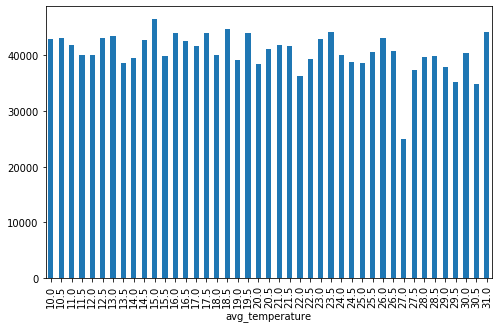

In [141]:
temp_passenger.plot(kind='bar',figsize=(8,5))
plt.show()

#### 求皮尔逊系数，看气温与客流量的相关性

In [142]:
temp_passenger_dataframe=pd.DataFrame(temp_passenger).reset_index()
temp_passenger_dataframe.corr()

,avg_temperature,avg_passenger
avg_temperature,1.000000,-0.404799
avg_passenger,-0.404799,1.000000


### 查看风力对客流量的影响

#### 计算某平均风力的客流量

In [143]:
wind_passenger=weather_passenger.groupby('avg_wind').sum()['Card_id']
wind_passenger=pd.DataFrame(wind_passenger).reset_index()
wind_passenger

,avg_wind,Card_id
0,0.0,5250605
1,1.0,371542
2,1.5,78501
3,2.0,152955
4,2.5,129213
5,3.0,42464


#### 计算某平均风力的天数

In [144]:
wind_day=weather_passenger.groupby('avg_wind').count()['Date_time']
wind_day=pd.DataFrame(wind_day).reset_index()
wind_day

,avg_wind,Date_time
0,0.0,133
1,1.0,9
2,1.5,2
3,2.0,4
4,2.5,3
5,3.0,1


#### 连接表 求某平均风力平均每天的客流量

In [145]:
wind_passenger_day=pd.merge(wind_day,wind_passenger,on='avg_wind',how='inner')
wind_passenger_day

,avg_wind,Date_time,Card_id
0,0.0,133,5250605
1,1.0,9,371542
2,1.5,2,78501
3,2.0,4,152955
4,2.5,3,129213
5,3.0,1,42464


In [146]:
wind_passenger_day['avg_wind_passenger']=wind_passenger_day['Card_id']/wind_passenger_day['Date_time']
wind_passenger_day

,avg_wind,Date_time,Card_id,avg_wind_passenger
0,0.0,133,5250605,39478.233083
1,1.0,9,371542,41282.444444
2,1.5,2,78501,39250.500000
3,2.0,4,152955,38238.750000
4,2.5,3,129213,43071.000000
5,3.0,1,42464,42464.000000


In [147]:
wind_passengerbyday=wind_passenger_day.set_index('avg_wind')['avg_wind_passenger']
wind_passengerbyday

avg_wind
0.0    39478.233083
1.0    41282.444444
1.5    39250.500000
2.0    38238.750000
2.5    43071.000000
3.0    42464.000000
Name: avg_wind_passenger, dtype: float64

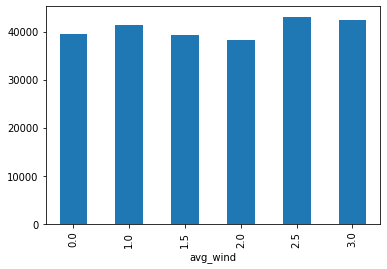

In [148]:
wind_passengerbyday.plot(kind='bar')
plt.show()

In [149]:
wind_passenger_day.corr()

,avg_wind,Date_time,Card_id,avg_wind_passenger
avg_wind,1.000000,-0.781169,-0.781770,0.516803
Date_time,-0.781169,1.000000,0.999993,-0.294914
Card_id,-0.781770,0.999993,1.000000,-0.292437
avg_wind_passenger,0.516803,-0.294914,-0.292437,1.000000


### 查看气候对客流量的影响

#### 计算平均气候的客流量

In [150]:
weather_avg_passenger=weather_passenger.groupby('avg_weather').sum()['Card_id']
weather_avg_passenger=pd.DataFrame(weather_avg_passenger).reset_index()
weather_avg_passenger

,avg_weather,Card_id
0,0.0,1575365
1,0.5,647485
2,1.0,1565062
3,1.5,418235
4,2.0,411027
5,2.5,170624
6,3.0,267368
7,3.5,39191
8,4.0,44409
9,5.5,86129


#### 计算平均气候的天数

In [151]:
weather_day = weather_passenger.groupby('avg_weather').count()['Date_time']
weather_day = pd.DataFrame(weather_day).reset_index()
weather_day

,avg_weather,Date_time
0,0.0,38
1,0.5,16
2,1.0,40
3,1.5,10
4,2.0,10
5,2.5,4
6,3.0,7
7,3.5,1
8,4.0,1
9,5.5,2


In [152]:
weather_passenger_day = pd.merge(weather_day,weather_avg_passenger,on='avg_weather',how='inner')
weather_passenger_day['weather_population'] = weather_passenger_day['Card_id']/weather_passenger_day['Date_time']
weather_passenger_day

,avg_weather,Date_time,Card_id,weather_population
0,0.0,38,1575365,41456.973684
1,0.5,16,647485,40467.812500
2,1.0,40,1565062,39126.550000
3,1.5,10,418235,41823.500000
4,2.0,10,411027,41102.700000
5,2.5,4,170624,42656.000000
6,3.0,7,267368,38195.428571
7,3.5,1,39191,39191.000000
8,4.0,1,44409,44409.000000
9,5.5,2,86129,43064.500000


In [153]:
weather_passengerbyday = weather_passenger_day.set_index('avg_weather')['weather_population']
weather_passengerbyday

avg_weather
0.0     41456.973684
0.5     40467.812500
1.0     39126.550000
1.5     41823.500000
2.0     41102.700000
2.5     42656.000000
3.0     38195.428571
3.5     39191.000000
4.0     44409.000000
5.5     43064.500000
6.0     32618.600000
6.5        46.000000
7.5     36892.000000
8.5     39931.000000
10.5    38424.000000
11.0    37082.153846
Name: weather_population, dtype: float64

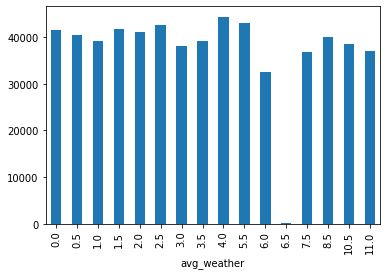

In [154]:
weather_passengerbyday.plot(kind='bar')
plt.show()

In [155]:
weather_passenger_day.corr()

,avg_weather,Date_time,Card_id,weather_population
avg_weather,1.000000,-0.540201,-0.558544,-0.258662
Date_time,-0.540201,1.000000,0.998815,0.185799
Card_id,-0.558544,0.998815,1.000000,0.210646
weather_population,-0.258662,0.185799,0.210646,1.000000


## 构造特征工程

### 根据分析，对客流量有较大影响的特征有: 是否节假日，是否周末，小时，卡类型，气候，风力，气温

In [156]:
line_281_passengerbytime

,Deal_time,Card_id,Date_time
0,2014-08-01 00:00:00,86,2014-08-01
1,2014-08-01 05:00:00,37,2014-08-01
2,2014-08-01 06:00:00,1118,2014-08-01
3,2014-08-01 07:00:00,4448,2014-08-01
4,2014-08-01 08:00:00,4964,2014-08-01
...,...,...,...
3178,2014-12-31 19:00:00,2495,2014-12-31
3179,2014-12-31 20:00:00,1880,2014-12-31
3180,2014-12-31 21:00:00,2068,2014-12-31
3181,2014-12-31 22:00:00,1154,2014-12-31


#### 对日期类型取数据 dt.（day，month，dayofweek）

In [157]:
line_281_passengerbytime['hour']=line_281_passengerbytime['Deal_time'].dt.hour
line_281_passengerbytime

,Deal_time,Card_id,Date_time,hour
0,2014-08-01 00:00:00,86,2014-08-01,0
1,2014-08-01 05:00:00,37,2014-08-01,5
2,2014-08-01 06:00:00,1118,2014-08-01,6
3,2014-08-01 07:00:00,4448,2014-08-01,7
4,2014-08-01 08:00:00,4964,2014-08-01,8
...,...,...,...,...
3178,2014-12-31 19:00:00,2495,2014-12-31,19
3179,2014-12-31 20:00:00,1880,2014-12-31,20
3180,2014-12-31 21:00:00,2068,2014-12-31,21
3181,2014-12-31 22:00:00,1154,2014-12-31,22


In [158]:
line_281_passengerbytime['week']=line_281_passengerbytime['Deal_time'].dt.dayofweek
line_281_passengerbytime

,Deal_time,Card_id,Date_time,hour,week
0,2014-08-01 00:00:00,86,2014-08-01,0,4
1,2014-08-01 05:00:00,37,2014-08-01,5,4
2,2014-08-01 06:00:00,1118,2014-08-01,6,4
3,2014-08-01 07:00:00,4448,2014-08-01,7,4
4,2014-08-01 08:00:00,4964,2014-08-01,8,4
...,...,...,...,...,...
3178,2014-12-31 19:00:00,2495,2014-12-31,19,2
3179,2014-12-31 20:00:00,1880,2014-12-31,20,2
3180,2014-12-31 21:00:00,2068,2014-12-31,21,2
3181,2014-12-31 22:00:00,1154,2014-12-31,22,2


In [159]:
import numpy as np

In [160]:
def is_holiday(day):
    if day > np.datetime64('2014-09-30') and day < np.datetime64('2014-10-08'):
        return 1
    else:
        return 0

In [161]:
line_281_passengerbytime['is_holiday']=line_281_passengerbytime['Deal_time'].apply(is_holiday)
line_281_passengerbytime

,Deal_time,Card_id,Date_time,hour,week,is_holiday
0,2014-08-01 00:00:00,86,2014-08-01,0,4,0
1,2014-08-01 05:00:00,37,2014-08-01,5,4,0
2,2014-08-01 06:00:00,1118,2014-08-01,6,4,0
3,2014-08-01 07:00:00,4448,2014-08-01,7,4,0
4,2014-08-01 08:00:00,4964,2014-08-01,8,4,0
...,...,...,...,...,...,...
3178,2014-12-31 19:00:00,2495,2014-12-31,19,2,0
3179,2014-12-31 20:00:00,1880,2014-12-31,20,2,0
3180,2014-12-31 21:00:00,2068,2014-12-31,21,2,0
3181,2014-12-31 22:00:00,1154,2014-12-31,22,2,0


In [162]:
#line_281_passenger = pd.merge(line_281_passengerbytime,line_281_passenger_card,on='Date_time',how='left')
#line_281_passenger.head()

In [163]:
line_281_passengerbytime=pd.DataFrame(line_281_passengerbytime).reset_index()
line_281_passengerbytime['Date_time']=pd.to_datetime(line_281_passengerbytime['Date_time'])
line_281_passengerbytime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3183 entries, 0 to 3182
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       3183 non-null   int64         
 1   Deal_time   3183 non-null   datetime64[ns]
 2   Card_id     3183 non-null   int64         
 3   Date_time   3183 non-null   datetime64[ns]
 4   hour        3183 non-null   int64         
 5   week        3183 non-null   int64         
 6   is_holiday  3183 non-null   int64         
dtypes: datetime64[ns](2), int64(5)
memory usage: 174.2 KB


In [164]:
feature_target_data = pd.merge(line_281_passengerbytime, weather_data,on='Date_time',how='left')
feature_target_data.head()

,index,Deal_time,Card_id,Date_time,hour,week,is_holiday,Weather,Temperature,Wind_direction_force,front_wind,behind_wind,avg_wind,front_weather,behind_weather,avg_weather,high_temperature,low_temperature,avg_temperature
0,0,2014-08-01 00:00:00,86,2014-08-01,0,4,0,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0
1,1,2014-08-01 05:00:00,37,2014-08-01,5,4,0,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0
2,2,2014-08-01 06:00:00,1118,2014-08-01,6,4,0,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0
3,3,2014-08-01 07:00:00,4448,2014-08-01,7,4,0,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0
4,4,2014-08-01 08:00:00,4964,2014-08-01,8,4,0,晴/雷阵雨,36℃/26℃,无持续风向≤3级/无持续风向≤3级,0,0,0.0,0,11,5.5,36,26,31.0


####  将连续性数据变成离散型数据的俩种方法   one-hot 热编码   get_dummies 哑变量

In [165]:
day_of_hour=pd.get_dummies(feature_target_data['hour'],prefix='hour')
day_of_hour

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [166]:
day_of_week=pd.get_dummies(feature_target_data['week'],prefix='week')
day_of_week

,week_0,week_1,week_2,week_3,week_4,week_5,week_6
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
3178,0,0,1,0,0,0,0
3179,0,0,1,0,0,0,0
3180,0,0,1,0,0,0,0
3181,0,0,1,0,0,0,0


In [167]:
is_holiday = pd.get_dummies(feature_target_data['is_holiday'], prefix='is_holiday')

In [169]:
#card=pd.get_dummies(feature_target_data['card_type'], prefix='card_type')
#card

In [170]:
front_wind = pd.get_dummies(feature_target_data['front_wind'],prefix='front_wind')
behind_wind = pd.get_dummies(feature_target_data['behind_wind'],prefix='behind_wind')

In [171]:
front_weather = pd.get_dummies(feature_target_data['front_weather'],prefix='front_weather')
behind_weather = pd.get_dummies(feature_target_data['behind_weather'],prefix='behind_weather')

In [172]:
category_feature = pd.concat([day_of_hour,is_holiday,day_of_week,behind_wind,front_wind,front_weather,behind_weather],axis=1)
category_feature

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,behind_weather_1,behind_weather_2,behind_weather_3,behind_weather_4,behind_weather_5,behind_weather_6,behind_weather_7,behind_weather_8,behind_weather_10,behind_weather_11
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 处理连续型数值变量：标准化和归一化

#### 归一化  把所有的数据都映射到（0,1）之间
              公式: (max-当前值)/(max-min)
      标准化 把所有的数据映射到平均值为0，标准差为1之间
              公式: (当前值-平均值)/标准差

In [173]:
from sklearn.preprocessing import StandardScaler

In [174]:
scaler = StandardScaler()

In [175]:
high_temperature = pd.DataFrame(scaler.fit_transform(feature_target_data[['high_temperature']]),columns=['stand_high_temperature'])
low_temperature = pd.DataFrame(scaler.fit_transform(feature_target_data[['low_temperature']]),columns=['stand_low_temperature'])
avg_temperature = pd.DataFrame(scaler.fit_transform(feature_target_data[['avg_temperature']]),columns=['stand_avg_temperature'])

In [176]:
feature_target = pd.concat([category_feature,high_temperature,low_temperature,avg_temperature,feature_target_data[['Card_id']]],axis=1)
feature_target

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,behind_weather_5,behind_weather_6,behind_weather_7,behind_weather_8,behind_weather_10,behind_weather_11,stand_high_temperature,stand_low_temperature,stand_avg_temperature,Card_id
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1.311274,1.162529,1.261184,86
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1.311274,1.162529,1.261184,37
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1.311274,1.162529,1.261184,1118
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1.311274,1.162529,1.261184,4448
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1.311274,1.162529,1.261184,4964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.866137,-1.813341,-1.348820,2495
3179,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.866137,-1.813341,-1.348820,1880
3180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.866137,-1.813341,-1.348820,2068
3181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.866137,-1.813341,-1.348820,1154


## 训练模型

### 线性回归算法

In [177]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [178]:
model = LinearRegression()#实例化线性回归模型

### 将数据分成训练集和测试集

In [179]:
X = feature_target.drop('Card_id',axis=1)#axis=1按列索引
y = feature_target[['Card_id']]

In [180]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)#分割数据，random_state确定的随机值会使结果相同

In [181]:
model.fit(X_train,y_train)#训练模型，训练成功存结果模型

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [182]:
y_predict = model.predict(X_test)#输入测试数据，输出预测结果
y_predict

array([[ 3.4062500e+02],
       [ 1.5212500e+03],
       [ 5.3250000e+01],
       [ 1.4356250e+03],
       [ 3.3012500e+03],
       [ 1.8653125e+03],
       [ 1.7368750e+02],
       [ 2.0497500e+03],
       [ 1.0646875e+03],
       [ 2.3859375e+03],
       [ 1.8406250e+03],
       [ 1.9423750e+03],
       [ 2.5201250e+03],
       [ 2.0160625e+03],
       [ 6.5687500e+02],
       [ 2.8241250e+03],
       [ 1.8479375e+03],
       [ 2.9965625e+03],
       [ 1.5818750e+03],
       [ 2.4343750e+02],
       [ 3.4462500e+02],
       [ 2.2808750e+03],
       [ 1.7868750e+02],
       [ 1.4665625e+03],
       [ 2.7683750e+03],
       [ 1.4750000e+03],
       [ 1.8985000e+03],
       [ 2.5068750e+03],
       [ 4.1326875e+03],
       [ 1.8923125e+03],
       [ 1.9268125e+03],
       [ 2.9544375e+03],
       [ 1.8419375e+03],
       [ 2.0711875e+03],
       [ 2.4405000e+03],
       [-1.8700000e+02],
       [ 2.4363750e+03],
       [ 1.9541250e+03],
       [-1.8000000e+01],
       [ 3.2281250e+03],


In [183]:
# , =model.evaluate(X_test,y_test) 输入数据和标签，输出损失和精确度

In [184]:
model.score(X_test,y_test)

0.8373131713795052

In [185]:
model.score(X_train,y_train)

0.864093013050041

### 岭回归

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge().fit(X_train,y_train)

In [ ]:
ridge_model.score(X_test,y_test)

In [ ]:
ridge_model.score(X_train,y_train)

### Lasso回归

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso().fit(X_train,y_train)

In [ ]:
lasso_model.score(X_test,y_test)

In [ ]:
lasso_model.score(X_train,y_train)

### Bagging回归

In [ ]:
from sklearn.ensemble import BaggingRegressor
model_BaggingRegressor = BaggingRegressor().fit(X_train,y_train)

In [ ]:
model_BaggingRegressor.score(X_test,y_test) 

In [ ]:
model_BaggingRegressor.score(X_train,y_train) 

### 决策树回归

In [ ]:
from sklearn import tree
model_DecisionTreeRegressor = tree.DecisionTreeRegressor().fit(X_train,y_train)

In [ ]:
model_DecisionTreeRegressor.score(X_test,y_test)

In [ ]:
model_DecisionTreeRegressor.score(X_train,y_train)

### KNN回归

In [ ]:
from sklearn import neighbors
model_KNeighborsRegressor = neighbors.KNeighborsRegressor().fit(X_train,y_train)

In [ ]:
model_KNeighborsRegressor.score(X_test,y_test)

In [ ]:
model_KNeighborsRegressor.score(X_train,y_train)

### 随机森林回归

In [ ]:
from sklearn import ensemble
model_RandomForestRegressor = ensemble.RandomForestRegressor(n_estimators=20).fit(X_train,y_train)

In [ ]:
model_RandomForestRegressor.score(X_test,y_test)

In [ ]:
model_RandomForestRegressor .score(X_train,y_train)